In [3]:
import pandas as pd

In [4]:
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

 this data is based on the EV population in the United States. Now, let’s clean the dataset before moving forward

In [5]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [8]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

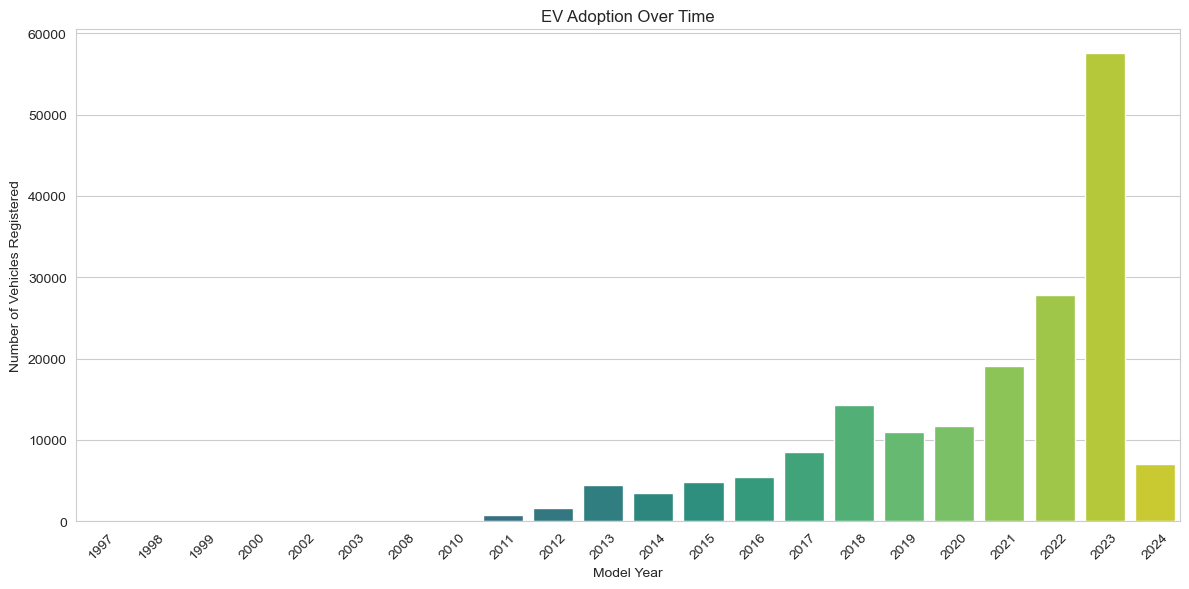

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#Ev adoption over Time
plt.figure(figsize=(12,6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

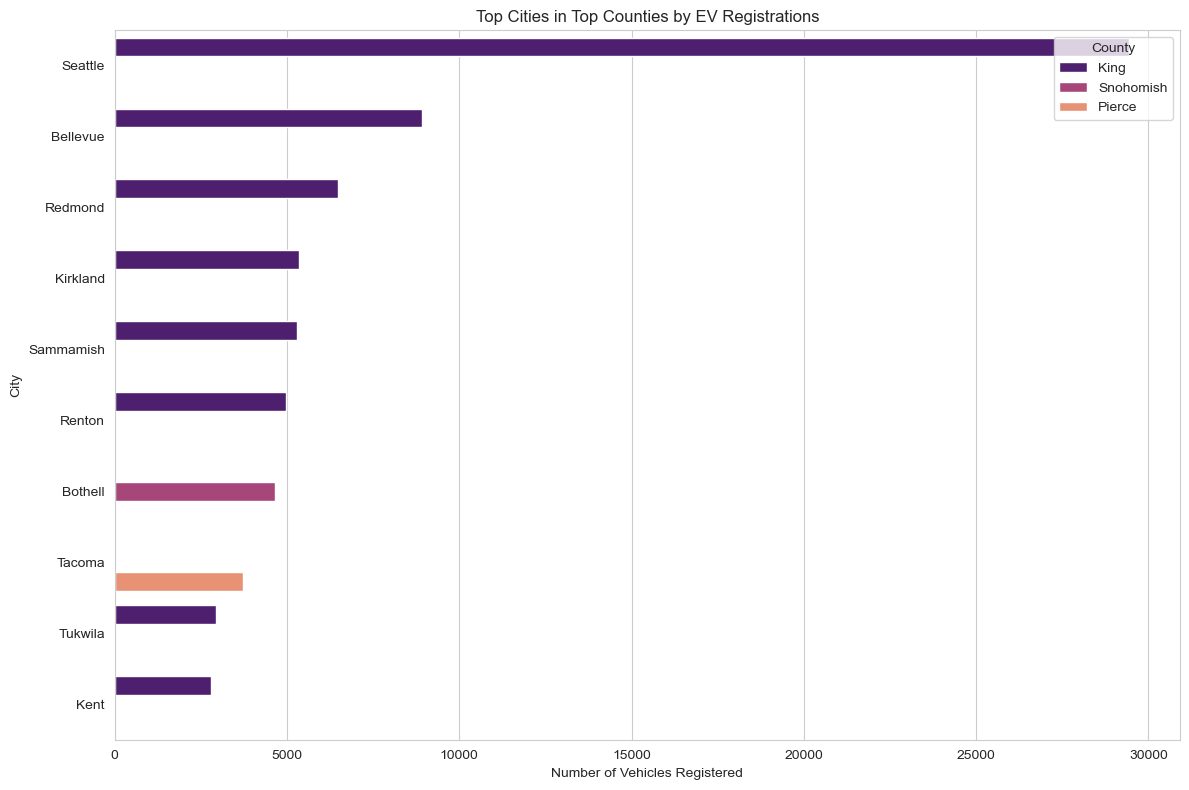

In [13]:
# geographical distribution at county level
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

#filtering the dataset for these top counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

ev_city_distribution_top_counties = top_counties_data.groupby(['County','City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')


top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

The above graph compares the number of electric vehicles registered in various cities within three counties: King, Snohomish, and Pierce. The horizontal bars represent cities, and their length corresponds to the number of vehicles registered, colour-coded by county.


 let’s explore the types of electric vehicles represented in this dataset. Understanding the breakdown between different EV types, such as Battery Electric Vehicles (BEV) and Plug-in Hybrid Electric Vehicles (PHEV), can provide insights into consumer preferences and the adoption patterns of purely electric vs. hybrid electric solutions. So, let’s visualize the distribution of electric vehicle types to see which categories are most popular among the registered vehicles

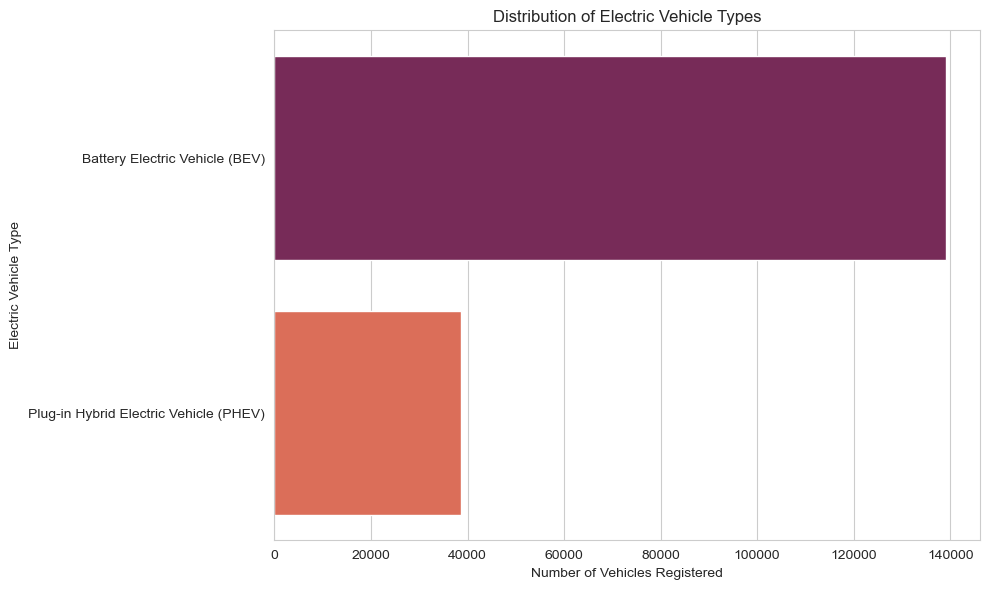

In [15]:
#analyzing the distribution of electric vehicle  Types
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

The above graph shows that BEVs are more popular or preferred over PHEVs among the electric vehicles registered in the United States.

let’s have a look at the most popular manufacturers and then drill down into the most popular models within those manufacturers:

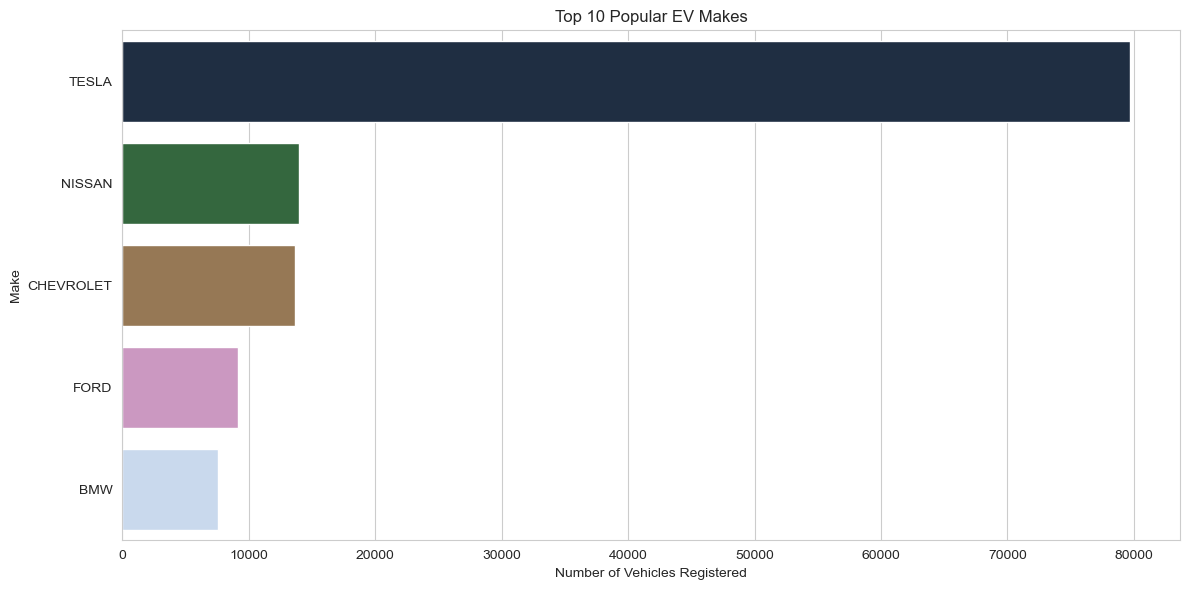

In [17]:
#analyzing the popularity of EV manufactures
ev_make_distribution = ev_data['Make'].value_counts().head() #Limiting to top 10 for clarity

plt.figure(figsize=(12,6))
sns.barplot(x = ev_make_distribution.values, y= ev_make_distribution.index, palette="cubehelix")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

Next, let’s drill down into the most popular models within these top manufacturers to get a more detailed understanding of consumer preferences at the model level

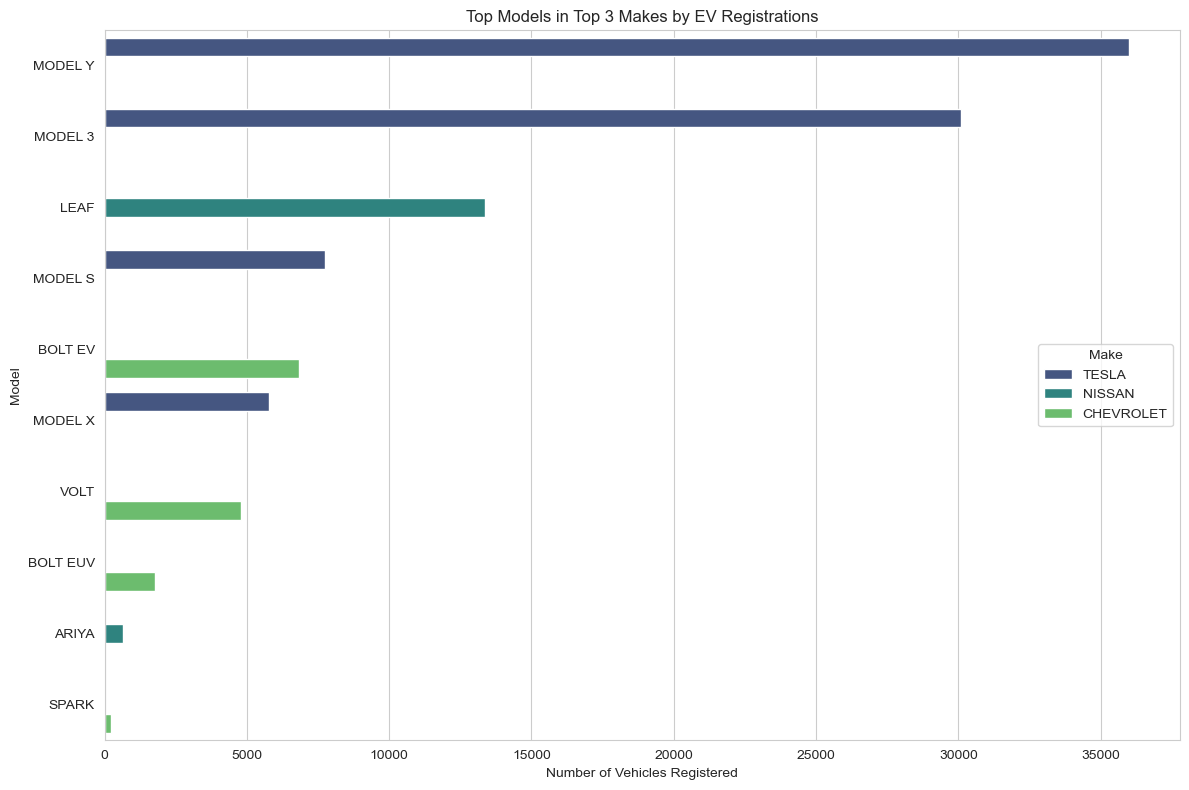

In [23]:
top_3_makes =ev_make_distribution.head(3).index

top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

ev_model_distribution_top_makes = top_makes_data.groupby(['Make','Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

top_models = ev_models =ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(12,8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()


we’ll explore the electric range of vehicles, which is a critical factor for analyzing the market size of electric vehicles. The electric range indicates how far an EV can travel on a single charge, and advancements in battery technology have been steadily increasing these ranges over the years. So, let’s look at the distribution of electric ranges in the dataset and identify any notable trends, such as improvements over time or variations between different vehicle types or manufacturers

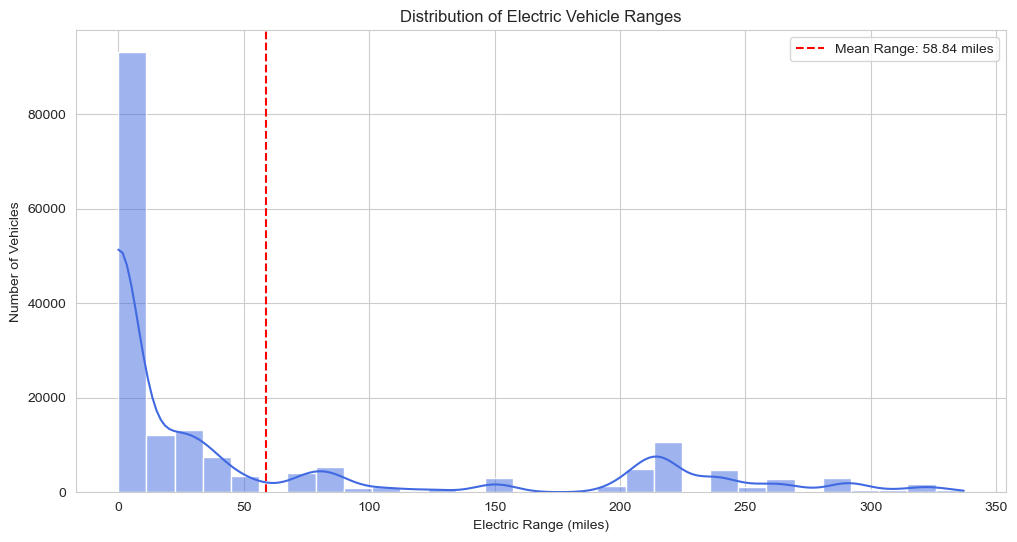

In [26]:
#analyzing the distribution of electric range 

plt.figure(figsize=(12,6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

 calculating the average electric range by model year

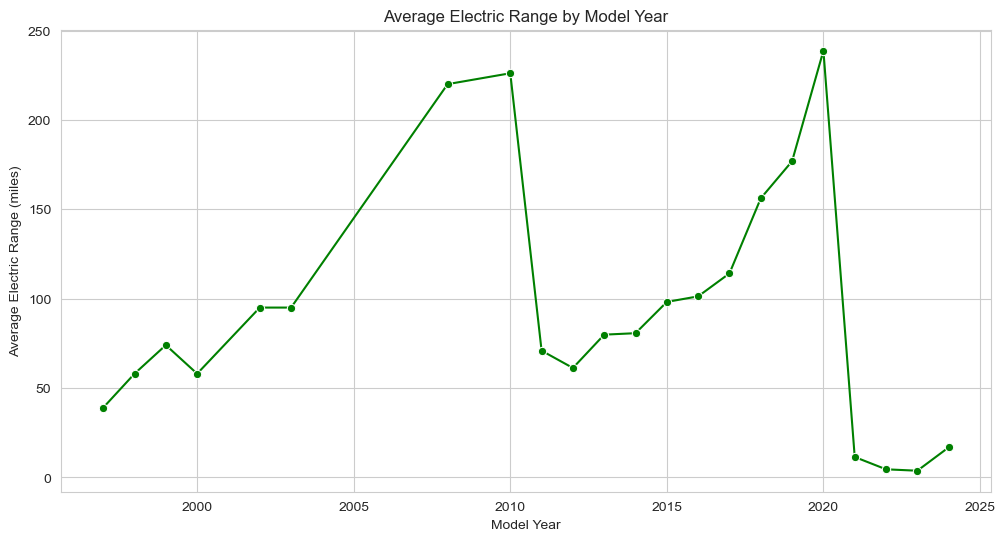

In [28]:
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

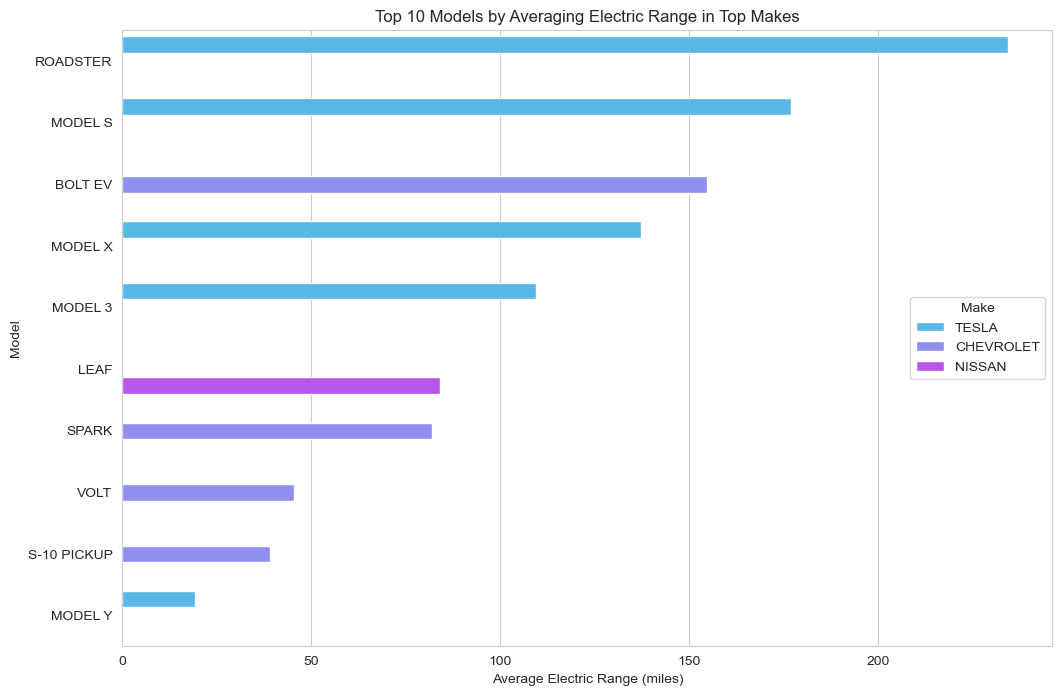

In [30]:
average_range_by_model = top_makes_data.groupby(['Make','Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12,8))
barplot = sns.barplot(x='Electric Range', y='Model',hue='Make', data=top_range_models, palette="cool" )
plt.title('Top 10 Models by Averaging Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

The TESLA ROADSTER has the highest average electric range among the models listed. TESLA’s models (ROADSTER, MODEL S, MODEL X, and MODEL 3) occupy the majority of the top positions, indicating that on average, TESLA’s vehicles have higher electric ranges. The CHEVROLET BOLT EV is an outlier among the CHEVROLET models, having a substantially higher range than the VOLT and S-10 PICKUP from the same maker. NISSAN’s LEAF and CHEVROLET’s SPARK are in the lower half of the chart, suggesting more modest average ranges.

In [31]:
# Calulate the number of Evs registered each year
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       20
2010       23
2011      775
2012     1618
2013     4409
2014     3509
2015     4844
2016     5483
2017     8562
2018    14323
2019    10940
2020    11768
2021    19132
2022    27776
2023    57587
2024     7080
Name: Model Year, dtype: int64

To forecast the total number of EVs expected to be registered in 2024, we can use a growth rate based approach from previous complete years.

We’ll calculate the Compound Annual Growth Rate (CAGR) between a recent year with complete data (2023) and an earlier year to project the 2024 figures. Additionally, using this growth rate, we can estimate the market size for the next five years. Let’s proceed with these calculations

In [37]:
from scipy.optimize import curve_fit
import numpy as np

filtered_years =ev_registration_counts[ev_registration_counts.index <= 2023]

#define a function for exponential growth to fit the  data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

#prepare the data for curve fitting 
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

#fit the data to the exponential growth function 
params, covariance = curve_fit(exp_growth, x_data, y_data)

# the fitted function to forecast the number of EVs  and next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecast_values = exp_growth(forecast_years, *params)

forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecast_values))


print(forecasted_evs)

{2024: 79092.26358070358, 2025: 119565.00850312428, 2026: 180748.2882793602, 2027: 273240.0066284026, 2028: 413061.179903938, 2029: 624431.02841697}


Now, let’s plot the estimated market size data

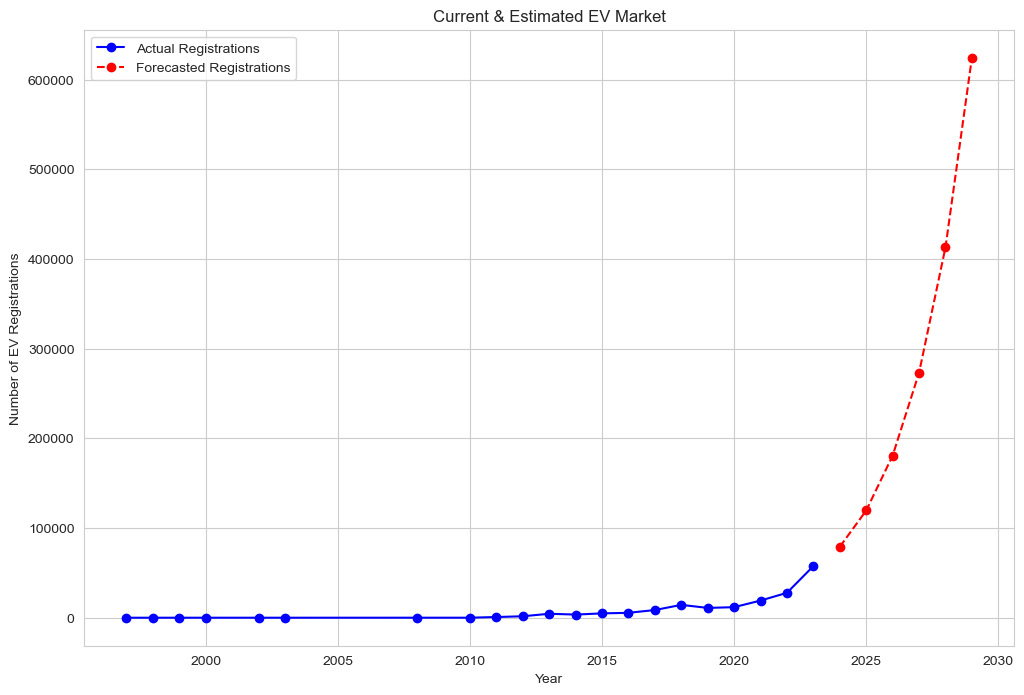

In [39]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2019 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

#actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations' )


plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()


# Summary

So, market size analysis is a crucial aspect of market research that determines the potential sales volume within a given market. It helps businesses understand the magnitude of demand, assess market saturation levels, and identify growth opportunities. From our market size analysis of electric vehicles, we found a promising future for the EV industry, indicating a significant shift in consumer preferences and a potential increase in related investment and business opportunities.